In [203]:
# Importing necessary libraries and modules for data manipulation and analysis
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [204]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv("/kaggle/input/titanic/test.csv")
dftrain_test = pd.concat([train, test], axis=0, ignore_index=True)

# Age Data Analysis

In [205]:
#Age Data Analysis
# Compute the mean age
Agem = dftrain_test['Age'].mean()

# The function fills NaN values with the mean age and rounds the result
def clean_age(dataset):
    return dataset.fillna(Agem).round()

dftrain_test['Age'] = clean_age(dftrain_test['Age'])
dftrain_test['Age'] = dftrain_test['Age'].astype(int)


# Embarked

In [206]:
#Embarked

# Drop rows in the combined dataset where either 'Embarked' or 'Fare' has missing (NaN) values.
# This is done to ensure data completeness for these particular columns. Only a couple of missing values

dftrain_test = dftrain_test.dropna(subset=['Embarked','Fare'])

# Encoding

In [207]:
#Encoding

# Convert the 'Sex' column from categorical to numerical:
dftrain_test['Sex'] = dftrain_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
# Convert the 'Embarked' column from categorical to numerical:
dftrain_test['Embarked'] = dftrain_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

# Cabin

In [208]:
#Cabin
# Create a dictionary to map cabin letters (deck levels) to numerical values.
# This is done to convert the categorical 'Cabin' column into a numerical 'Deck' column.
# 'U' stands for Unknown as some cabin values are missing in the dataset.
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, 'T': 8, "U": 9}

dftrain_test['Cabin']= dftrain_test['Cabin'].fillna('U')
dftrain_test['Deck'] = dftrain_test['Cabin'].str[0].map(deck)
dftrain_test['Deck'] = dftrain_test['Deck'].astype(int)


In [209]:
#seperate data sets
dftrain = dftrain_test[dftrain_test['Survived'].notna()]
dftest = dftrain_test[dftrain_test['Survived'].isna()]

# Correlation Matrix

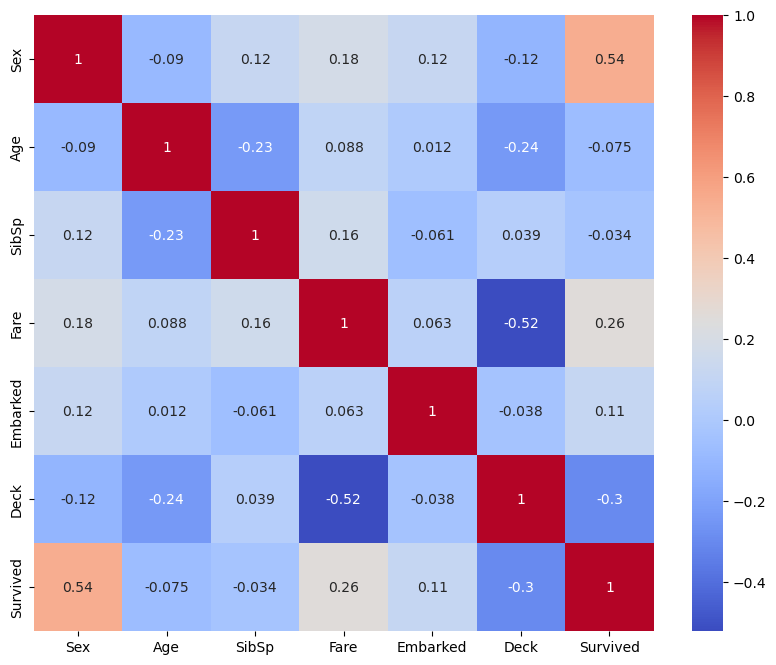

In [210]:
correlation_matrix = dftrain[['Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Deck','Survived']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Categorical Visuals

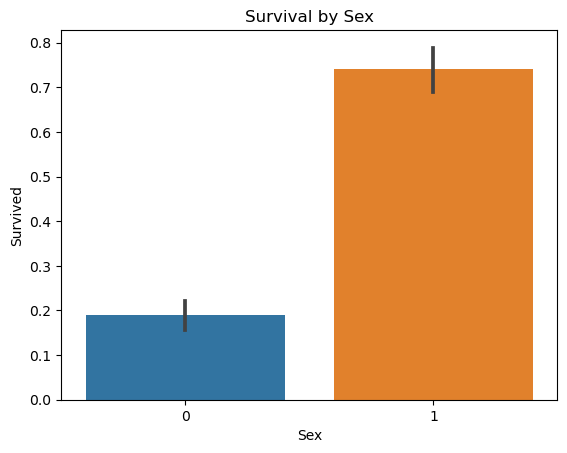

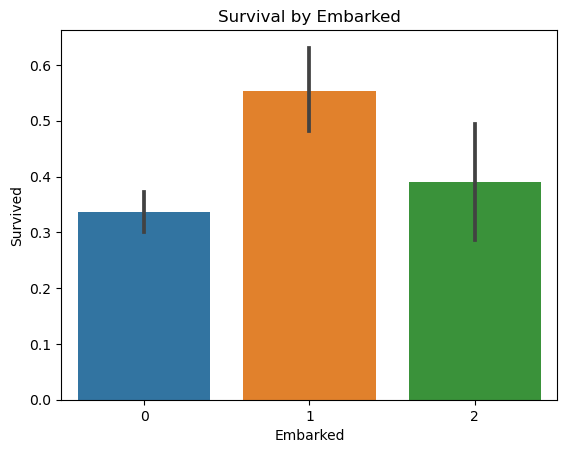

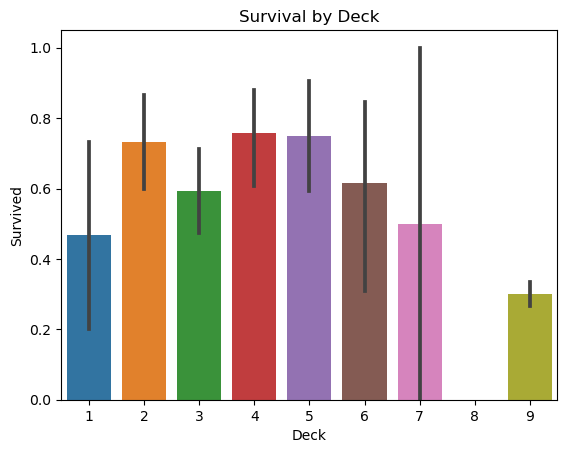

In [211]:
categorical_features = ['Sex', 'Embarked', 'Deck']

for feature in categorical_features:
    sns.barplot(x=feature, y='Survived', data=dftrain)
    plt.title(f'Survival by {feature}')
    plt.show()

# Distributions

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


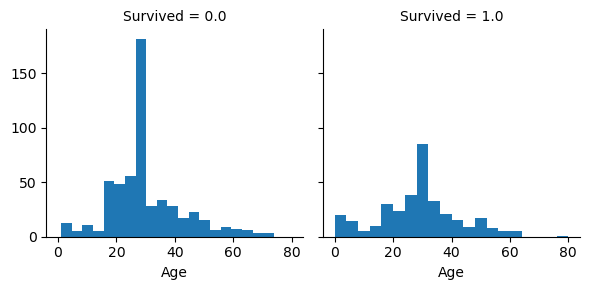

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


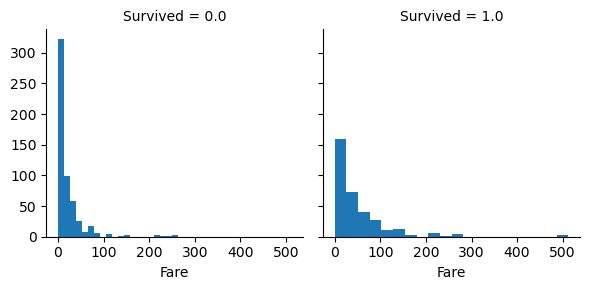

In [212]:
continuous_features = ['Age', 'Fare']

for feature in continuous_features:
    grid = sns.FacetGrid(dftrain, col='Survived')
    grid.map(plt.hist, feature, bins=20)
    plt.show()

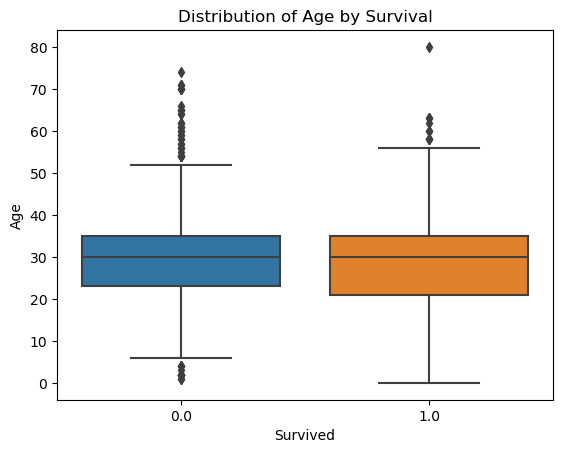

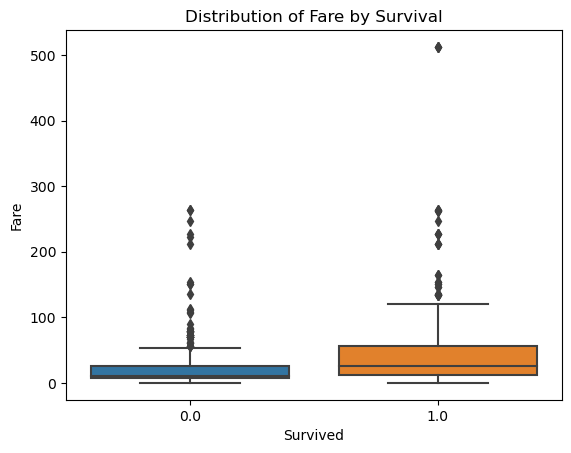

In [213]:
for feature in continuous_features:
    sns.boxplot(x='Survived', y=feature, data=dftrain)
    plt.title(f'Distribution of {feature} by Survival')
    plt.show()

# Linear Regression Model

In [214]:
features = ['Sex', 'Age', 'Deck']
X_train = dftrain[features]
y_train = dftrain['Survived']
X_test = dftest[features]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

In [215]:
X_train_sm = sm.add_constant(X_train)

model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     163.5
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           2.48e-84
Time:                        16:10:15   Log-Likelihood:                -423.91
No. Observations:                 889   AIC:                             855.8
Df Residuals:                     885   BIC:                             875.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7066      0.063     11.198      0.0